In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import matplotlib.pyplot as plt 
from scipy.stats import t
import statistics 

In [2]:
path = "D:/Hoc Tap/Kỳ 1/PFP191/Python/KY3/MAS291/NHANES_age_prediction.csv"

In [3]:

file = path.split('/')
tittle = file[-1].replace('.csv','')
tittle

'NHANES_age_prediction'

In [4]:
def readcsv(path):
    order = pd.read_csv(path)
    return order

order = readcsv(path)
order

,SEQN,age_group,RIDAGEYR,RIAGENDR,PAQ605,BMXBMI,LBXGLU,DIQ010,LBXGLT,LBXIN
0,73564.0,Adult,61.0,2.0,2.0,35.7,110.0,2.0,150.0,14.91
1,73568.0,Adult,26.0,2.0,2.0,20.3,89.0,2.0,80.0,3.85
2,73576.0,Adult,16.0,1.0,2.0,23.2,89.0,2.0,68.0,6.14
3,73577.0,Adult,32.0,1.0,2.0,28.9,104.0,2.0,84.0,16.15
4,73580.0,Adult,38.0,2.0,1.0,35.9,103.0,2.0,81.0,10.92
...,...,...,...,...,...,...,...,...,...,...
2273,83711.0,Adult,38.0,2.0,2.0,33.5,100.0,2.0,73.0,6.53
2274,83712.0,Adult,61.0,1.0,2.0,30.0,93.0,2.0,208.0,13.02
2275,83713.0,Adult,34.0,1.0,2.0,23.7,103.0,2.0,124.0,21.41
2276,83718.0,Adult,60.0,2.0,2.0,27.4,90.0,2.0,108.0,4.99


In [5]:
df = order[['age_group','RIDAGEYR', 'BMXBMI']]
df = pd.DataFrame(df)
df

,age_group,RIDAGEYR,BMXBMI
0,Adult,61.0,35.7
1,Adult,26.0,20.3
2,Adult,16.0,23.2
3,Adult,32.0,28.9
4,Adult,38.0,35.9
...,...,...,...
2273,Adult,38.0,33.5
2274,Adult,61.0,30.0
2275,Adult,34.0,23.7
2276,Adult,60.0,27.4


In [6]:
df.describe()    

,RIDAGEYR,BMXBMI
count,2278.000000,2278.000000
mean,41.795874,27.955180
std,20.156111,7.248962
min,12.000000,14.500000
25%,24.000000,22.800000
50%,41.000000,26.800000
75%,58.000000,31.200000
max,80.000000,70.100000


In [7]:
vithanhnien = df.loc[(df.RIDAGEYR >=10) & (df.RIDAGEYR <= 16),['age_group','RIDAGEYR','BMXBMI']]
thanhnien = df.loc[(df.RIDAGEYR >=18) & (df.RIDAGEYR <= 24), ['age_group','RIDAGEYR','BMXBMI']]


Test statistic on group 10-16 (years old)


In [8]:
vithanhnien.describe()

,RIDAGEYR,BMXBMI
count,285.000000,285.000000
mean,14.080702,24.077895
std,1.462132,6.441560
min,12.000000,14.500000
25%,13.000000,19.700000
50%,14.000000,22.100000
75%,15.000000,27.500000
max,16.000000,50.500000


In [9]:
# Đặt giả thuyết H0: mean_pupulation = 24,9
mean_population_10_16 = 24.9
Sample_mean_10_16=vithanhnien['BMXBMI'].mean()
Sample_Std_10_16 = vithanhnien['BMXBMI'].std()
Count_sample_10_16= vithanhnien['BMXBMI'].count()
Degree_of_freedom_10_16 = Count_sample_10_16 - 1
Critical_value_10_16=stats.t.ppf(0.95, Degree_of_freedom_10_16, loc=0, scale=1)
print('Mean Population  :',  mean_population_10_16)
print('Sample mean      :', Sample_mean_10_16)
print('Sample Std       :',Sample_Std_10_16)
print('Critical value   :',Critical_value_10_16)
print('Number of samples:',Count_sample_10_16)
Test_10_16 = (Sample_mean_10_16 - mean_population_10_16) / (Sample_Std_10_16 / np.sqrt(Count_sample_10_16))
print('Test point       :',Test_10_16)
P_value=stats.t.cdf(Test_10_16, Degree_of_freedom_10_16, loc=0, scale=1)
print('P_value          :', P_value)

# Đối thuyết H1 sẽ là H1: mean population >24,9 
if Test_10_16 > Critical_value_10_16 :
    print('\n')
    print('         Reject H0           ')
else:
    print('\n')
    print('         Fail to reject H0       ')

Mean Population  : 24.9
Sample mean      : 24.077894736842108
Sample Std       : 6.441560352710595
Critical value   : 1.650236662405076
Number of samples: 285
Test point       : -2.1545609209506704
P_value          : 0.01601852224338062


         Fail to reject H0       


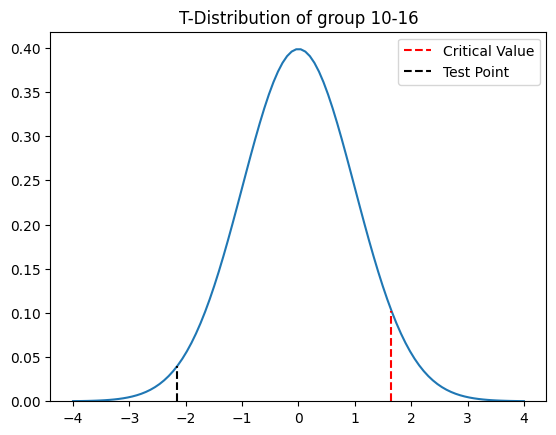

In [10]:
x_max =4
x_min =-4
x = np.linspace(x_min, x_max, 100)


degrees_of_freedom = [Degree_of_freedom_10_16]  
for df in degrees_of_freedom:
    y = t.pdf(x, df)  
    plt.plot(x, y)


y_critical_value_10_16 = t.pdf(Critical_value_10_16, Degree_of_freedom_10_16, loc=0, scale=1)
y_test_10_16 = t.pdf(Test_10_16, Degree_of_freedom_10_16, loc=0, scale=1)
plt.plot([Critical_value_10_16, Critical_value_10_16], [0, y_critical_value_10_16], color='red', linestyle='--', label='Critical Value')
plt.plot([Test_10_16, Test_10_16], [0, y_test_10_16], color='black', linestyle='--', label='Test Point')



plt.ylim(0, plt.ylim()[1])
plt.legend()
plt.title('T-Distribution of group 10-16')
plt.savefig('D:/Hoc Tap/Kỳ 1/PFP191/Python/KY3/MAS291/T-Distribution of group 10-16.png')



Test statistic on group 18-24 (years old)


In [11]:
thanhnien.describe()

,RIDAGEYR,BMXBMI
count,270.000000,270.000000
mean,20.511111,26.394074
std,2.111631,7.341801
min,18.000000,16.200000
25%,18.000000,21.300000
50%,20.000000,24.150000
75%,22.000000,29.450000
max,24.000000,68.600000


In [12]:
# Đặt giả thuyết H0: mean_pupulation = 24,9
mean_population_18_24 = 24.9
Sample_mean_18_24=thanhnien['BMXBMI'].mean()
Sample_Std_18_24 = thanhnien['BMXBMI'].std()
Count_sample_18_24= thanhnien['BMXBMI'].count()
Degree_of_freedom_18_24 = Count_sample_18_24 - 1
Critical_value_18_24=stats.t.ppf(0.95, Degree_of_freedom_18_24, loc=0, scale=1)
print('Mean Population  :',  mean_population_18_24)
print('Sample mean      :', Sample_mean_18_24)
print('Sample Std       :',Sample_Std_18_24)
print('Critical value   :',Critical_value_18_24)
print('Number of samples:',Count_sample_18_24)
Test_18_24 = (Sample_mean_18_24 - mean_population_18_24) / (Sample_Std_18_24 / np.sqrt(Count_sample_18_24))
print('Test point       :',Test_18_24)
P_value=stats.t.cdf(Test_18_24, Degree_of_freedom_18_24, loc=0, scale=1)
print('P_value          :', P_value)

# Đối thuyết H1 sẽ là H1: mean population >24,9 
if Test_18_24 > Critical_value_18_24 :
    print('\n')
    print('         Reject H0           ')
else:
    print('\n')
    print('         Fail to reject H0       ')

Mean Population  : 24.9
Sample mean      : 26.394074074074073
Sample Std       : 7.3418013142037255
Critical value   : 1.6505378734925191
Number of samples: 270
Test point       : 3.3438853951447607
P_value          : 0.999528214978679


         Reject H0           


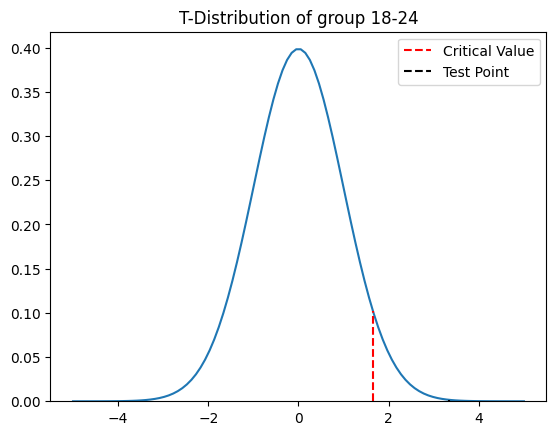

In [13]:
x_max =5
x_min =-5
x = np.linspace(x_min, x_max, 100)


degrees_of_freedom = [Degree_of_freedom_18_24]  
for df in degrees_of_freedom:
    y = t.pdf(x, df)  
    plt.plot(x, y)


y_critical_value_18_24 = t.pdf(Critical_value_18_24, Degree_of_freedom_18_24, loc=0, scale=1)
y_test_18_24 = t.pdf(Test_18_24, Degree_of_freedom_18_24, loc=0, scale=1)
plt.plot([Critical_value_18_24, Critical_value_18_24], [0, y_critical_value_18_24], color='red', linestyle='--', label='Critical Value')
plt.plot([Test_18_24, Test_18_24], [0, y_test_18_24], color='black', linestyle='--', label='Test Point')



plt.ylim(0, plt.ylim()[1])
plt.legend()
plt.title('T-Distribution of group 18-24')
plt.savefig('D:/Hoc Tap/Kỳ 1/PFP191/Python/KY3/MAS291/T-Distribution of group 28-24.png')

